# Interacting with the API through Tweepy


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

#Enter keys




In [ ]:
#@title Varsayılan başlık metni
consumer_key= 'xxx'
consumer_secret= 'xxx'
access_token= 'xxxxx'
access_token_secret= 'xxx'

# Login to twitter dev account

In [ ]:
auth = tw.OAuthHandler(consumer_key, consumer_secret) #Login to twitter 
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

# Clean tweets

In [ ]:
def remove_url(txt): #To remove links in the tweets
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [ ]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Data çekme

In [ ]:
search_term = "#covid+19 -filter:retweets" #Filtre girme

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2019-11-01').items(5000) #Tarih ve çekilecek data sayısı

# Remove URLs
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets] #Linkleri temizleme

In [ ]:
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls] #######TextBlow kütüphnesiyle dataseti için duygu analizi oluşturma
sentiment_objects[0].polarity, sentiment_objects[0]

(0.025000000000000005,
 TextBlob("Many Covid patients in other countriesUse common sensewear a mask stay away from crowdsLets get Covid unde"))

In [ ]:
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects] #DataFrame olusturma 
sentiment_values[0]

[0.025000000000000005,
 'Many Covid patients in other countriesUse common sensewear a mask stay away from crowdsLets get Covid unde']

In [ ]:
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head()

,polarity,tweet
0,0.025,Many Covid patients in other countriesUse comm...
1,0.000,GovRonDeSantis Florida COVID19 deaths rise for...
2,0.500,Canadas top doctor has said the latest wave of...
3,0.000,Florida COVID19 deaths rise for second week in...
4,0.000,COVID19 Turned My Backyard into a Lumber Yard ...


In [ ]:
sentiment_df['polarity'] = sentiment_df['polarity'].round(1) ##Yüzdelikli değerler verdiği için yuvarlama

In [ ]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]

# Veri Görselleştirme

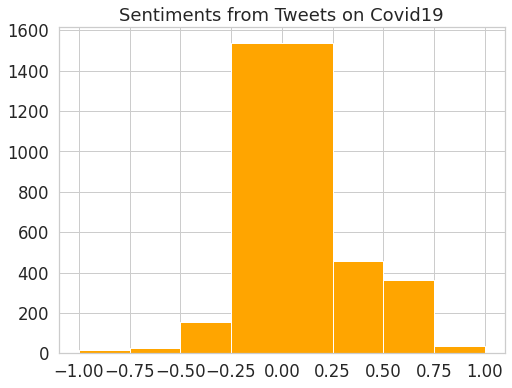

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="orange")
plt.title("Sentiments from Tweets on Covid19")
plt.show()

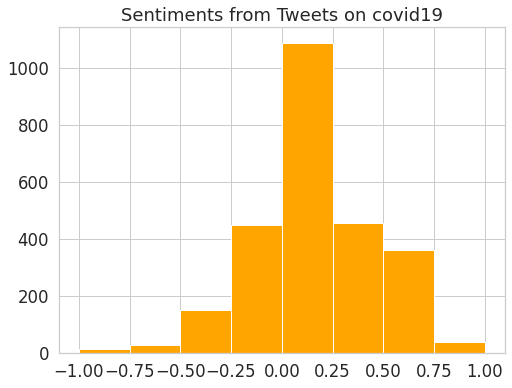

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="orange")

plt.title("Sentiments from Tweets on covid19")
plt.show()

In [ ]:
from wordcloud import WordCloud

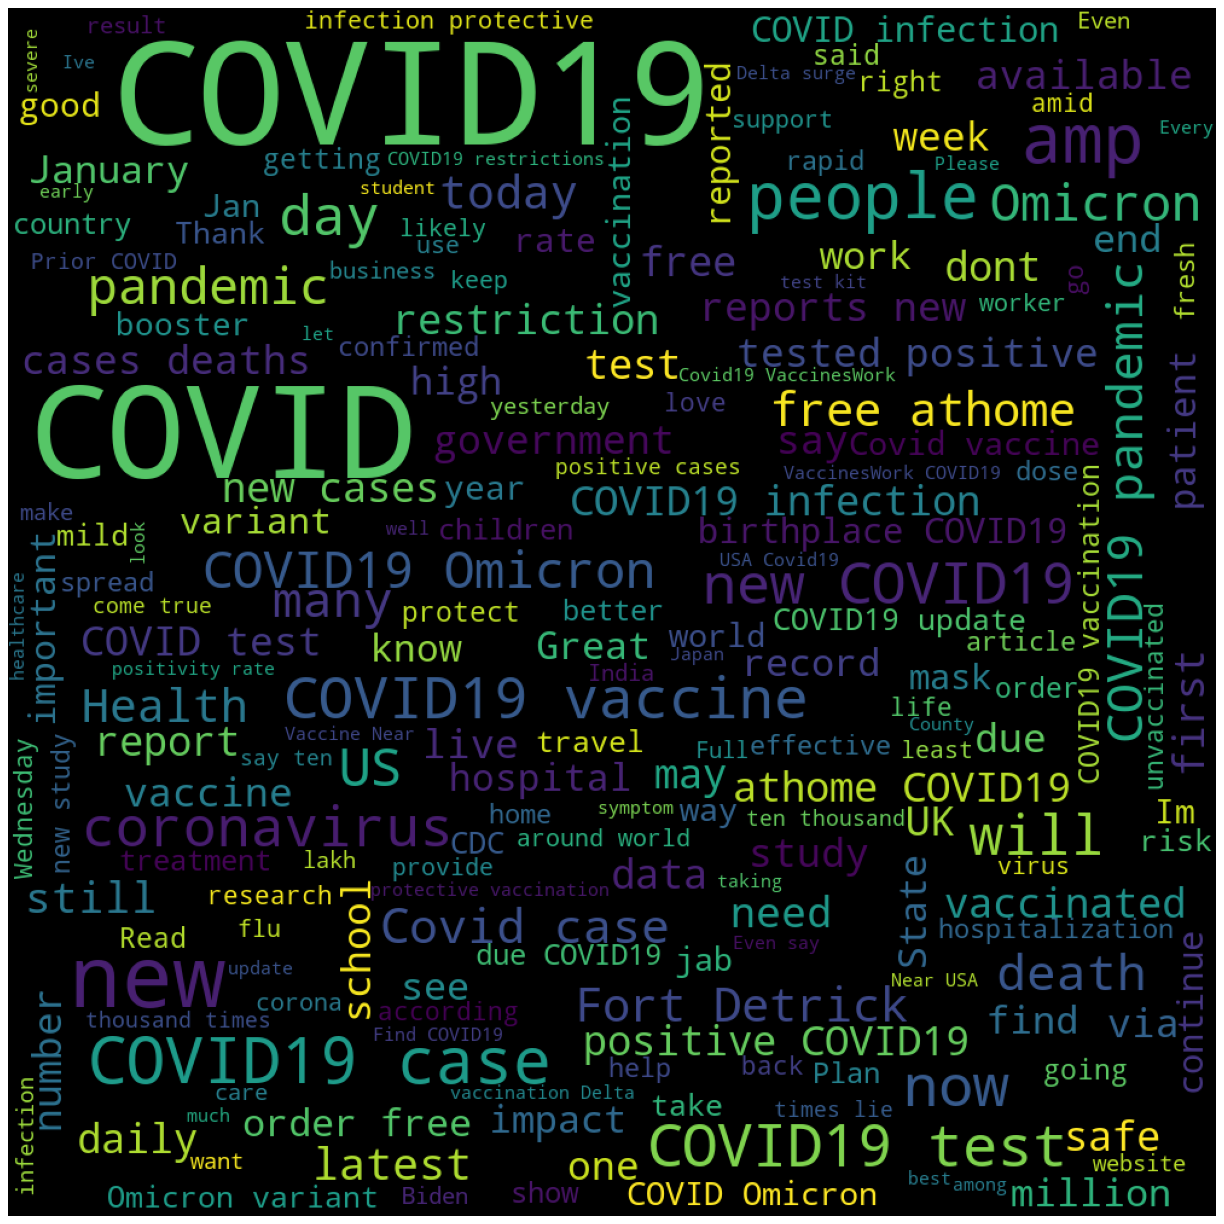

In [ ]:
allwords = " ".join([txt for txt in sentiment_df["tweet"].astype(str)])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 42, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

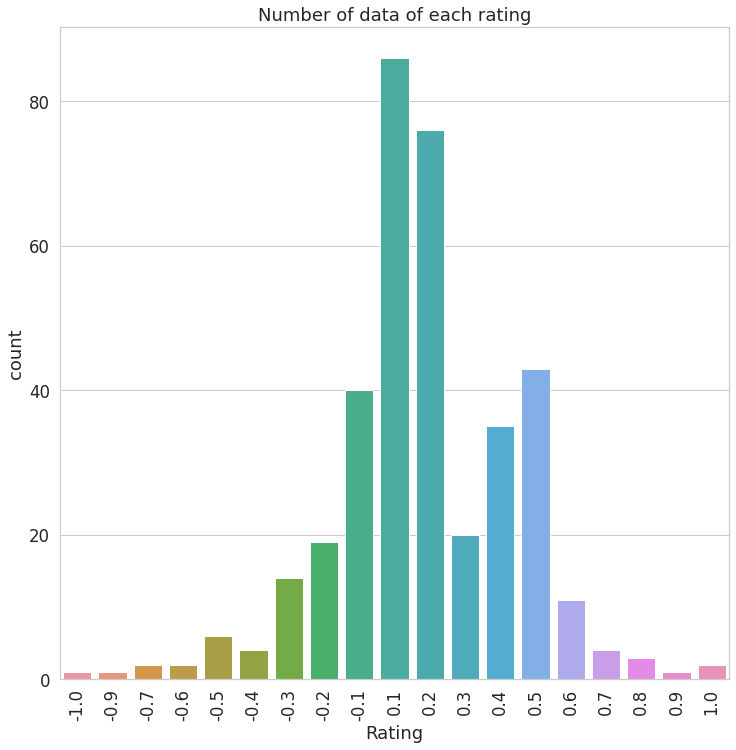

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x='polarity', data=sentiment_df[::7])
plt.xlabel("Rating")
plt.xticks(rotation=90)
plt.title("Number of data of each rating")
plt.show()


In [ ]:
sentiment_df["Sentiment"] = sentiment_df["tweet"].apply(lambda x : analyze_sentiment(x))
sentiment_df.head(5)

,polarity,tweet,Sentiment
2,0.5,Canadas top doctor has said the latest wave of...,Positive
7,-0.2,A genetic analysis hints at why COVID19 can me...,Negative
8,0.3,We learned a lot from COVID over the last two ...,Positive
9,0.1,Nearly a quarter of 999 ambulance calls are no...,Positive
11,0.3,Covid day 5 I dont feel like Im dying anymore ...,Positive


In [ ]:
sentiment_df["Sentiment"].value_counts()

Positive    1945
Negative     645
Name: Sentiment, dtype: int64

Text(0.5, 1.0, 'Summary of Counts for Total tweets')

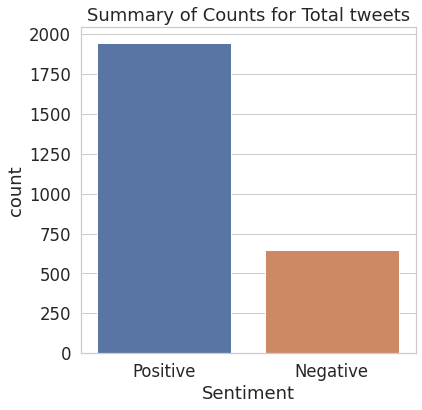

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(sentiment_df["Sentiment"])
plt.title("Summary of Counts for Total tweets")

In [ ]:
sentiment_df["polarity"]

2       0.5
7      -0.2
8       0.3
9       0.1
11      0.3
       ... 
4993    0.3
4994    0.1
4995    0.2
4996   -0.1
4998    0.1
Name: polarity, Length: 2590, dtype: float64

# Sentiment Analysis

In [ ]:
pip install turicreate

In [ ]:
import turicreate as tc
from turicreate import SFrame

In [ ]:
sf = SFrame(sentiment_df)

In [ ]:
sf['word_count'] = tc.text_analytics.count_words(sf['tweet'])

In [ ]:
sf

polarity,tweet,Sentiment,word_count
0.5,Canadas top doctor hassaid the latest wave of ...,Positive,"{'b': 1.0, 'peak': 1.0,'have': 1.0, 'may': 1.0, ..."
-0.2,A genetic analysis hintsat why COVID19 can mess ...,Negative,"{'here': 1.0,'smellfound': 1.0, 'a': ..."
0.3,We learned a lot fromCOVID over the last two ...,Positive,"{'with': 1.0, 'two': 1.0,'over': 1.0, 'de': 1.0, ..."
0.1,Nearly a quarter of 999ambulance calls are ...,Positive,"{'about': 1.0, 'please':1.0, 'its': 1.0, 'a': ..."
0.3,Covid day 5 I dont feellike Im dying anymore ...,Positive,"{'im': 1.0, 'anymore':1.0, 'good': 1.0, 'li ..."
0.2,Why was Omicron only mildin comparison to Delta ...,Positive,"{'returns': 1.0, 'the':1.0, 'compliance': 1.0, ..."
0.7,The COVID19 vaccinesoffer the best protec ...,Positive,"{'a': 1.0, 'yours': 1.0,'get': 1.0, 'their': ..."
0.2,GovKathyHochul was inBuffalo Saturday ...,Positive,"{'ready': 1.0, 'yet':1.0, 'not': 1.0, 'was': ..."
-0.3,Man In Italy Tries ToDodge COVID Vaccine U ...,Negative,"{'covid19': 1.0,'armitaly': 1.0, 'man': ..."
0.2,ProfKarolSikora QuiteClearly for those of us ...,Positive,"{'s': 1.0, 'yet': 1.0,'with': 1.0, 'others': ..."


In [ ]:
sf= sf[sf['polarity'] !=0]

# Model

In [ ]:
train_data,test_data=sf.random_split(0.8, seed=0)

In [ ]:
sentiment_model = tc.logistic_classifier.create(train_data, target='Sentiment',features=['word_count'] ,
                                                      validation_set=test_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 2070

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 6706

Number of coefficients      : 6707

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 0.028085     | 0.844444          | 0.800000            |

| 1         | 4        | 1.000000  | 0.045445     | 0.985990          | 0.876923            |

| 2         | 5        | 1.000000  | 0.058803     | 0.997101          | 0.875000            |

| 3         | 6        | 1.000000  | 0.078192     | 0.999034          | 0.880769            |

| 4         | 7        | 1.000000  | 0.091930     | 1.000000          | 0.886538            |

| 9         | 14       | 1.000000  | 0.131915     | 1.000000          | 0.871154            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

In [ ]:
sentiment_model.evaluate(test_data)


{'accuracy': 0.8711538461538462,
 'auc': 0.9097336945747707,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |   Negative   |     Positive    |   40  |
 |   Negative   |     Negative    |   71  |
 |   Positive   |     Negative    |   27  |
 |   Positive   |     Positive    |  382  |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.9193742478941035,
 'log_loss': 0.35130674947748947,
 'precision': 0.9052132701421801,
 'recall': 0.9339853300733496,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+--------------------+--------------------+-----+-----+
 | threshold |        fpr         |        tpr         |  p  |  n  |
 +-----------+--------------------+--------------------+-----+-----+
 |    0.0    |    

In [ ]:
sentiment_model.evaluate(test_data, metric='roc_curve')

{'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+--------------------+--------------------+-----+-----+
 | threshold |        fpr         |        tpr         |  p  |  n  |
 +-----------+--------------------+--------------------+-----+-----+
 |    0.0    |        1.0         |        1.0         | 409 | 111 |
 |   0.001   | 0.8018018018018018 | 0.9975550122249389 | 409 | 111 |
 |   0.002   | 0.7387387387387387 | 0.9975550122249389 | 409 | 111 |
 |   0.003   | 0.7207207207207207 | 0.9951100244498777 | 409 | 111 |
 |   0.004   | 0.7027027027027027 | 0.9951100244498777 | 409 | 111 |
 |   0.005   | 0.6846846846846847 | 0.9951100244498777 | 409 | 111 |
 |   0.006   | 0.6576576576576577 | 0.9951100244498777 | 409 | 111 |
 |   0.007   | 0.6576576576576577 | 0.9951100244498777 | 409 | 111 |
 |   0.008   | 0.6486486486486487 | 0.9951100244498777 | 409 | 111 |
 |   0.009   | 0.6306306306306306 | 0.9951100244498777 | 409 | 111 |

In [ ]:
sentiment_model.validation_accuracy


0.8711538461538462

In [ ]:
sentiment_model.validation_data['Sentiment'].value_counts()

value,count
1,409
0,111


In [ ]:
sentiment_model.validation_data['sentiment'].value_counts()

value,count
1,409
0,111


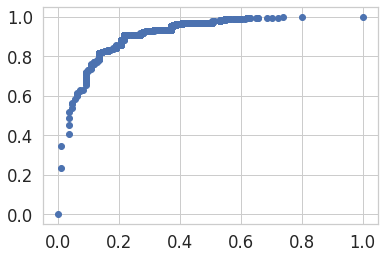

In [ ]:
temp1 = sentiment_model.validation_roc_curve['fpr']
temp2 = sentiment_model.validation_roc_curve['tpr']
plt.scatter(temp1, temp2)

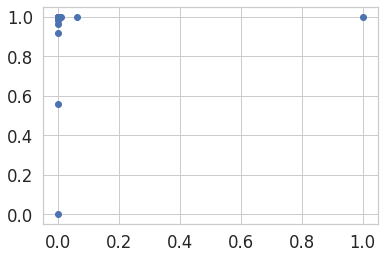

In [ ]:
temp1 = sentiment_model.training_roc_curve['fpr']
temp2 = sentiment_model.training_roc_curve['tpr']
plt.scatter(temp1, temp2)

# Selected Words

In [ ]:
selected_words = ['covid', 'hand', 'wash', 'virus', 'omicron', 'doctor', 'mask', 'pozitive', 'negative', 'covid', 'distance']

In [ ]:
for word in selected_words:
    sf[word] = sf['word_count'].apply(lambda counts: counts.get(word, 0))


In [ ]:
sf

polarity,tweet,Sentiment,word_count,mask,vaccine,wash,hand,doctor
0.5,Canadas top doctor hassaid the latest wave of ...,Positive,"{'b': 1.0, 'peak': 1.0,'have': 1.0, 'may': 1.0, ...",0,0.0,0,0,1.0
-0.2,A genetic analysis hintsat why COVID19 can mess ...,Negative,"{'here': 1.0,'smellfound': 1.0, 'a': ...",0,0.0,0,0,0.0
0.3,We learned a lot fromCOVID over the last two ...,Positive,"{'with': 1.0, 'two': 1.0,'over': 1.0, 'de': 1.0, ...",0,0.0,0,0,0.0
0.1,Nearly a quarter of 999ambulance calls are ...,Positive,"{'about': 1.0, 'please':1.0, 'its': 1.0, 'a': ...",0,0.0,0,0,0.0
0.3,Covid day 5 I dont feellike Im dying anymore ...,Positive,"{'im': 1.0, 'anymore':1.0, 'good': 1.0, 'li ...",0,0.0,0,0,0.0
0.2,Why was Omicron only mildin comparison to Delta ...,Positive,"{'returns': 1.0, 'the':1.0, 'compliance': 1.0, ...",0,0.0,0,0,0.0
0.7,The COVID19 vaccinesoffer the best protec ...,Positive,"{'a': 1.0, 'yours': 1.0,'get': 1.0, 'their': ...",0,0.0,0,0,0.0
0.2,GovKathyHochul was inBuffalo Saturday ...,Positive,"{'ready': 1.0, 'yet':1.0, 'not': 1.0, 'was': ...",0,0.0,0,0,0.0
-0.3,Man In Italy Tries ToDodge COVID Vaccine U ...,Negative,"{'covid19': 1.0,'armitaly': 1.0, 'man': ...",0,2.0,0,0,0.0
0.2,ProfKarolSikora QuiteClearly for those of us ...,Positive,"{'s': 1.0, 'yet': 1.0,'with': 1.0, 'others': ...",0,0.0,0,0,0.0


In [ ]:
for word in selected_words:
    print("\nThe number of times {} appears: {}".format(word, sf[word].sum()))


The number of times mask appears: 23

The number of times vaccine appears: 129.0

The number of times wash appears: 2

The number of times hand appears: 0

The number of times doctor appears: 8.0

The number of times virus appears: 68.0

The number of times omicron appears: 214.0

The number of times bad appears: 11.0

The number of times sick appears: 27.0


In [ ]:
train_data,test_data = sf.random_split(.8, seed=0)


In [ ]:
features = selected_words


In [ ]:
sf['polarity'].show()


Materializing SArray

In [ ]:
sf['sentiment'] = sf['polarity'] >= 0

In [ ]:
sf


polarity,tweet,Sentiment,word_count,mask,vaccine,wash,hand,doctor
0.5,Canadas top doctor hassaid the latest wave of ...,Positive,"{'b': 1.0, 'peak': 1.0,'have': 1.0, 'may': 1.0, ...",0,0.0,0,0,1.0
-0.2,A genetic analysis hintsat why COVID19 can mess ...,Negative,"{'here': 1.0,'smellfound': 1.0, 'a': ...",0,0.0,0,0,0.0
0.3,We learned a lot fromCOVID over the last two ...,Positive,"{'with': 1.0, 'two': 1.0,'over': 1.0, 'de': 1.0, ...",0,0.0,0,0,0.0
0.1,Nearly a quarter of 999ambulance calls are ...,Positive,"{'about': 1.0, 'please':1.0, 'its': 1.0, 'a': ...",0,0.0,0,0,0.0
0.3,Covid day 5 I dont feellike Im dying anymore ...,Positive,"{'im': 1.0, 'anymore':1.0, 'good': 1.0, 'li ...",0,0.0,0,0,0.0
0.2,Why was Omicron only mildin comparison to Delta ...,Positive,"{'returns': 1.0, 'the':1.0, 'compliance': 1.0, ...",0,0.0,0,0,0.0
0.7,The COVID19 vaccinesoffer the best protec ...,Positive,"{'a': 1.0, 'yours': 1.0,'get': 1.0, 'their': ...",0,0.0,0,0,0.0
0.2,GovKathyHochul was inBuffalo Saturday ...,Positive,"{'ready': 1.0, 'yet':1.0, 'not': 1.0, 'was': ...",0,0.0,0,0,0.0
-0.3,Man In Italy Tries ToDodge COVID Vaccine U ...,Negative,"{'covid19': 1.0,'armitaly': 1.0, 'man': ...",0,2.0,0,0,0.0
0.2,ProfKarolSikora QuiteClearly for those of us ...,Positive,"{'s': 1.0, 'yet': 1.0,'with': 1.0, 'others': ...",0,0.0,0,0,0.0


In [ ]:
sf['sentiment'].show()

Materializing SArray

In [ ]:
train_data,test_data = sf.random_split(.8,seed=0)


In [ ]:
# Creating the model with selected words 
selected_words_model = tc.logistic_classifier.create(train_data,target='sentiment', 
                                                        features=features, 
                                                        validation_set=test_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 2070

Number of classes           : 2

Number of feature columns   : 9

Number of unpacked features : 9

Number of coefficients      : 10

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.008942     | 0.756039          | 0.796154            |

| 2         | 3        | 0.030400     | 0.756039          | 0.796154            |

| 3         | 4        | 0.039251     | 0.756039          | 0.796154            |

| 4         | 5        | 0.046974     | 0.756039          | 0.796154            |

| 5         | 6        | 0.060252     | 0.756039          | 0.796154            |

| 8         | 9        | 0.074606     | 0.756039          | 0.796154            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

In [ ]:
# Calling and descreibing our coefficients and weights allotted to each word
selected_words_model.coefficients.sort(key_column_names='value', ascending=True)

name,index,class,value,stderr
bad,None,1,-9.838422649259607,26.356473063355715
sick,None,1,-3.5274299408119756,0.7416417333769786
virus,None,1,-0.47923865334753946,0.2843906766300742
omicron,None,1,-0.038879639224221774,0.17908908649951213
hand,None,1,0.0,inf
vaccine,None,1,0.5186443174456435,nan
mask,None,1,0.5363845019033114,nan
(intercept),None,1,1.1023404623176354,0.05542549502784019
wash,None,1,7.73226919501629,nan
doctor,None,1,7.739792183788896,37.06026450485535


In [ ]:
sentiment_model.evaluate(test_data)

{'accuracy': 0.8711538461538462,
 'auc': 0.9097336945747707,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        1        |   40  |
 |      0       |        0        |   71  |
 |      1       |        0        |   27  |
 |      1       |        1        |  382  |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.9193742478941035,
 'log_loss': 0.35130674947748947,
 'precision': 0.9052132701421801,
 'recall': 0.9339853300733496,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+--------------------+--------------------+-----+-----+
 | threshold |        fpr         |        tpr         |  p  |  n  |
 +-----------+--------------------+--------------------+-----+-----+
 |    0.0    |    

In [ ]:
selected_words_model.evaluate(test_data)

{'accuracy': 0.7961538461538461,
 'auc': 0.5687129672459745,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 3
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        0        |   5   |
 |      0       |        1        |  106  |
 |      1       |        1        |  409  |
 +--------------+-----------------+-------+
 [3 rows x 3 columns],
 'f1_score': 0.8852813852813853,
 'log_loss': 0.5058426762696926,
 'precision': 0.7941747572815534,
 'recall': 1.0,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+--------------------+-----+-----+-----+
 | threshold |        fpr         | tpr |  p  |  n  |
 +-----------+--------------------+-----+-----+-----+
 |    0.0    |        1.0         | 1.0 | 409 | 111 |
 |   0.001   | 0.9819819819819819 | 1.0 | 409 | 111 |
 |   0.002   | 

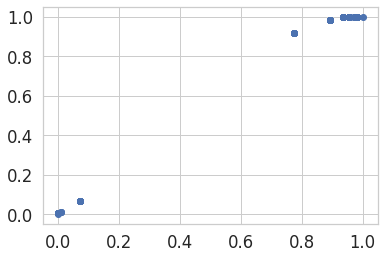

In [ ]:
temp1 = selected_words_model.validation_roc_curve['fpr']
temp2 = selected_words_model.validation_roc_curve['tpr']
plt.scatter(temp1, temp2)